In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import timeit
import time

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
df_pre = pd.read_csv(R"/Users/tejasgorla/VScode/MATE50001-Computing/Computing-Challenge2022/Preprocessed file.csv")
df_pre.drop('Unnamed: 0', inplace=True, axis=1)
df_pre

,v(A),r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),tG,τ,μ,Lowest distortion
0,0.0,0.387755,0.314286,0.740260,0.730159,0.494922,0.632855,0.206526,0.579628,0.450,rhombohedral
1,0.0,0.387755,0.314286,0.740260,0.841270,0.494922,0.058835,0.442386,0.592154,0.075,cubic
2,0.0,0.387755,0.314286,0.740260,0.396825,0.494922,0.281998,0.392439,0.579622,0.150,rhombohedral
3,0.0,0.387755,0.314286,0.740260,0.634921,0.494922,0.326314,0.493846,0.609865,0.000,cubic
4,0.0,0.387755,0.314286,0.740260,0.753968,0.494922,0.444628,0.459367,0.597470,0.050,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...
644,0.5,0.244898,0.314286,0.201299,0.349206,0.267856,0.245369,0.264963,0.626431,0.075,orthorhombic
645,0.5,0.244898,0.314286,0.201299,0.420635,0.267856,0.016747,0.313735,0.616744,0.000,orthorhombic
646,0.5,0.244898,0.314286,0.201299,1.000000,0.267856,0.000000,0.186833,0.666246,0.200,orthorhombic
647,0.5,0.244898,0.314286,0.201299,0.182540,0.267856,0.401449,0.097941,0.758633,0.350,orthorhombic


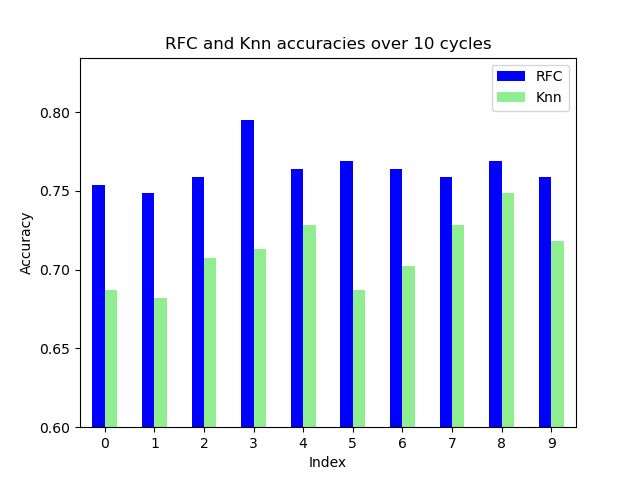

Accuracy means: 
RFC    0.764103
Knn    0.710256
dtype: float64
                 cubic  orthorhombic  tetragonal  rhombohedral
cubic         0.317949      0.051282    0.000000      0.000000
orthorhombic  0.097436      0.435897    0.005128      0.005128
tetragonal    0.005128      0.025641    0.000000      0.005128
rhombohedral  0.005128      0.035897    0.000000      0.010256
Acuracy 0.764102564102564
                 cubic  orthorhombic  tetragonal  rhombohedral
cubic         0.307692      0.061538    0.000000      0.000000
orthorhombic  0.087179      0.441026    0.005128      0.010256
tetragonal    0.010256      0.020513    0.000000      0.005128
rhombohedral  0.005128      0.035897    0.000000      0.010256
Acuracy 0.7589743589743589
                 cubic  orthorhombic  tetragonal  rhombohedral
cubic         0.307692      0.061538    0.000000      0.000000
orthorhombic  0.082051      0.446154    0.005128      0.010256
tetragonal    0.005128      0.025641    0.000000      0.005128
r

In [66]:
plt.clf()
def BestValues(df_pre):
    columns=list(df_pre.columns)
    index = columns.index("Lowest distortion")
    #remove Lowest column from data set to compare
    y_col = columns.pop(index)
    y = df_pre[y_col].to_numpy()
    X = df_pre[columns].to_numpy()
    X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

    rfc=RandomForestClassifier()
    knn = KNeighborsClassifier()
    
    param_grid_rfc = { 
    'n_estimators': list(range(1,80,10)),
    'max_depth' : list(range(1,20,4)),
    'criterion' :['gini', 'entropy']
    }
    
    param_grid_knn = {
    'leaf_size': list(range(1,15)),
    'n_neighbors': list(range(1,15)),
    'p': [1,2]
    }
    
    rfc_optimisedParams = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv = 5)
    rfc_optimisedParams.fit(X_train, y_train)
    
    knn_optimisedParams = GridSearchCV(estimator=knn,param_grid=param_grid_knn, cv=5 )
    knn_optimisedParams.fit(X_train, y_train)
    
    bestParamsRfc = rfc_optimisedParams.best_params_
    bestParamsKnn = knn_optimisedParams.best_params_
    return bestParamsRfc, bestParamsKnn

bestParamsRfc, bestParamsKnn = BestValues(df_pre)

def RanForest():
    columns=list(df_pre.columns)
    index = columns.index("Lowest distortion")
    #remove Lowest column from data set to compare
    y_col = columns.pop(index)
    y = df_pre[y_col].to_numpy()
    X = df_pre[columns].to_numpy()
    X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

    #print(bestparamsRfc.values())
    rfc1=RandomForestClassifier(
        max_features='auto',
        n_estimators=bestParamsRfc['n_estimators'],
        max_depth=bestParamsRfc['max_depth'],
        criterion=bestParamsRfc['criterion'])
    rfc1.fit(X_train, y_train)
    
    pred=rfc1.predict(X_test)
    #print(pred)
    #print(y_test)
    #accRfc = accuracy_score(y_test,pred)
    return pred, y_test

def KNeigh():
    columns=list(df_pre.columns)
    index = columns.index("Lowest distortion")
    #remove Lowest column from data set to compare
    y_col = columns.pop(index)
    y = df_pre[y_col].to_numpy()
    X = df_pre[columns].to_numpy()
    X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3) # random state removed
    knn1 = KNeighborsClassifier(
        leaf_size= bestParamsKnn['leaf_size'],
        n_neighbors= bestParamsKnn['n_neighbors'],
        p = bestParamsKnn['p']
    )
    knn1.fit(X_train, y_train)
    pred = knn1.predict(X_test)
    return pred, y_test

def conf_matrix(ytest, predict):
    structure = ["cubic", "orthorhombic", "tetragonal", "rhombohedral"]
    conf_matrix = confusion_matrix(ytest, predict, labels=structure)
    conf_matrixper = conf_matrix/np.sum(conf_matrix)
    #structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
    conf_matrixper = pd.DataFrame(conf_matrixper, index=structure, columns=structure)
    return conf_matrixper

#Accuracy comparrison cycled 10 times to get an average of the score
accRfc = []
accKnn = []
for i in range(10):
    predRfc, y_test_rfc = RanForest()
    predKnn, y_test_Knn = KNeigh()
    accRfc.append(accuracy_score(y_test_rfc,predRfc))
    accKnn.append(accuracy_score(y_test_Knn,predKnn))
accuracies = pd.DataFrame({'RFC': accRfc, 'Knn': accKnn}, columns=['RFC', 'Knn'])
accuracies.plot.bar(rot = '0', color=['blue', 'lightgreen'])
plt.legend(loc = 'upper right')
plt.ylim(bottom = 0.6)
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('RFC and Knn accuracies over 10 cycles')
plt.show()
print(f'Accuracy means: \n{accuracies.mean()}')
    
    
# print(f'Accuracy of Random Forest using the best hyperparameters: {accuracy_score(y_test_rfc,predRfc)}')
# print(f'Accuracy of K nearest neighbor using the best hyperparameters: {accuracy_score(y_test_Knn,predKnn)}')
#print(bestParamsRfc)
#pred, y_test = RanForest(bestParamsRfc)

# conf_matrixper
col = ["r(AXII)(Å)",'r(AVI)(Å)','EN(A)','EN(B)',"l(A-O)(Å)","l(B-O)(Å)","tG","τ","μ", "v(A)"]

for i in (col):
    #print(df_pre)
    df=df_pre.copy().drop(i,axis=1)
    # define new test data 
    pred, y_test = RanForest()
    #score, Lr = LogReg(X_train, X_test, y_train, y_test)
    #call RF
    #RF = RanForest(X_train, X_test, y_train, y_test)
    #Return predictions
    #bestpredict,finalscore,y_testfinal = findbeststratkfold(X_train, X_test, y_train, y_test, RF)
    #return conf matrix and
    conf = conf_matrix(y_test, pred)
    conf = pd.DataFrame(conf)
    print(conf)
    print('Acuracy', accuracy_score(y_test,pred))
    conf.to_csv(f"{i}.csv")
    
print(pred)
print(y_test)

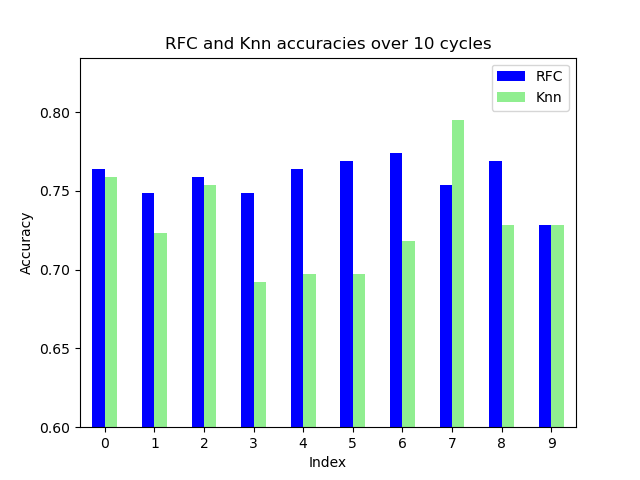

In [62]:
accRfc = []
accKnn = []
for i in range(10):
    predRfc, y_test_rfc = RanForest()
    predKnn, y_test_Knn = KNeigh()
    accRfc.append(accuracy_score(y_test_rfc,predRfc))
    accKnn.append(accuracy_score(y_test_Knn,predKnn))
accuracies = pd.DataFrame({'RFC': accRfc, 'Knn': accKnn}, columns=['RFC', 'Knn'])
accuracies.plot.bar(rot = '0', color=['blue', 'lightgreen'])
plt.legend(loc = 'upper right')
plt.ylim(bottom = 0.6)
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('RFC and Knn accuracies over 10 cycles')
plt.show()

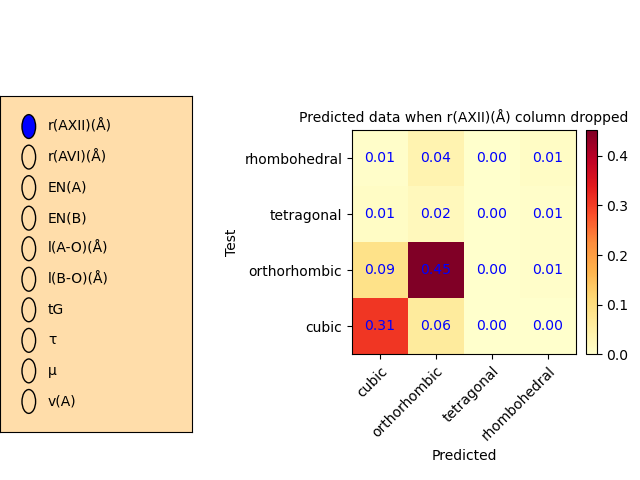

In [31]:
# import matplotlib.pyplot as plt
# from matplotlib.widgets import RadioButtons
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # plot confusion matrix
# fig, ax = plt.subplots()
# col = ['r(AXII)(Å)','r(AVI)(Å)','EN(A)','EN(B)',"l(A-O)(Å)",'l(B-O)(Å)','tG','τ','μ','v(A)']
# structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
# array = pd.read_csv('r(AXII)(Å).csv',index_col=[0])
# array = np.array(array)
# img = ax.imshow(array, cmap='YlOrRd', origin='lower')
# #bar  = plt.colorbar(img, )
# axins = inset_axes(ax,
#                     width="5%",  
#                     height="100%",
#                     loc='center right',
#                     borderpad=-1.5
#                    )
# fig.colorbar(img, cax=axins, orientation = "vertical")
# plt.subplots_adjust(left=0.55)
# for i in range(len(array)):
#     for j in range(len(array)):
#         text = ax.text(j, i, '%.2f' % array[i, j],
#                        ha="center", va="center", color="b")

# # label
# def set_labels():
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Test')
#     fig.set_label('Predicted vs Test')
#     # set tick labels
#     ax.set_xticks([0, 1, 2, 3])
#     ax.set_xticklabels(structure)
#     ax.set_yticks([0, 1, 2, 3])
#     ax.set_yticklabels(structure)
#     ax.set_title(f"Predicted data when {col[0]} column dropped", fontsize =10)
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# set_labels()

# #Rotate ticks
# #plt.xticks(rotation = 90)

# # create radio box
# radio_ax = plt.axes([0.0, 0.1, 0.3, 0.7], facecolor='#FFDDAA')

# # create radio buttons
# radio = RadioButtons(radio_ax, col)

# # callback function to run when buttons are pressed
# def callback(label):
#     ax.cla()
#     set_labels()
#     array = pd.read_csv(f'{label}.csv',index_col=[0])
#     array = np.array(array)
#     #clear(array)
#     for i in range(len(array)):
#         for j in range(len(array)):
#             text = ax.text(j, i, '%.2f' % array[i, j],
#                         ha="center", va="center", color="b")
#     ax.imshow(array, cmap='YlOrRd', origin='lower')
#     ax.set_title(f"Predicted data when {label} column dropped", fontsize =10)
#     return text
# # connect function to radio object and show
# radio.on_clicked(callback)
# plt.show()